# Books Recommender System

Industri buku telah mengalami pertumbuhan yang signifikan dalam beberapa tahun terakhir, dengan ribuan judul baru diterbitkan setiap tahunnya. Di Indonesia, data dari Ikatan Penerbit Indonesia (IKAPI) menunjukkan bahwa lebih dari 30.000 judul buku diterbitkan setiap tahun [[1]](https://kumparan.com/kumparannews/industri-buku-di-indonesia/full). Namun, rata-rata masyarakat Indonesia hanya membeli dua buku per tahun, yang menunjukkan tantangan dalam meningkatkan minat baca.

Selain itu, data dari Perpustakaan Nasional (Perpusnas) menunjukkan bahwa pada tahun 2021, hampir 160.000 ISBN diterbitkan, dengan 147.000 di antaranya adalah buku. Namun, jumlah ini menurun menjadi 107.800 ISBN pada tahun 2022 dan sedikit meningkat menjadi 108.000 ISBN pada tahun 2023. Hingga pertengahan 2024, sudah ada 70.000 ISBN yang diterbitkan, dengan 65.000 di antaranya untuk buku [[2]](https://data.goodstats.id/statistic/jumlah-isbn-indonesia-turun-sejak-2021-jZosj). Dengan semakin banyaknya buku yang diterbitkan setiap tahun, pengguna sering mengalami kesulitan dalam menemukan buku yang sesuai dengan preferensi mereka, khususnya buku digital yang kian menjadi metode berbeda untuk membaca dan menemukan buku baru [[3]](https://www.researchgate.net/publication/383038644_Sistem_Rekomendasi_Buku_Berbasis_Konten_Menggunakan_Metode_Collaborative_Filtering). Hal ini menekankan pentingnya sistem rekomendasi buku yang efektif untuk membantu pembaca menavigasi pilihan yang luas dan menemukan bacaan yang sesuai dengan minat mereka. 

Data berdasarkan penelitian menunjukkan bahwa penggunaan sistem rekomendasi berbasis content-based filtering dapat meningkatkan user engagement dan membantu pengguna dalam menemukan buku yang relevan dengan preferensi mereka [[4]](https://www.researchgate.net/publication/348968927_Personalized_Book_Recommendation_System_using_Machine_Learning_Algorithm). Sejalan dengan ini, studi lain mengonfirmasi bahwa algoritma machine learning berbasis collaborative filtering dapat meningkatkan akurasi rekomendasi buku secara signifikan [[5]](https://ieeexplore.ieee.org/document/7019651).

Sistem rekomendasi buku menjadi sangat penting karena beberapa alasan:
1. Membantu pengguna menemukan konten yang relevan di antara ribuan pilihan yang ada.
2. Meningkatkan engagement user pada platform penjualan atau penyedia layanan buku.
3. Memberikan pengalaman personalisasi yang lebih baik kepada pembaca.
4. Membantu penerbit dan distributor buku dalam memasarkan konten mereka secara lebih efektif.

**Referensi Riset Terkait:**

[1] [Industri Buku di Indonesia](https://kumparan.com/kumparannews/industri-buku-di-indonesia/full)  
[2] [Jumlah ISBN Indonesia Turun Sejak 2021](https://data.goodstats.id/statistic/jumlah-isbn-indonesia-turun-sejak-2021-jZosj)  
[3] [Sistem Rekomendasi Buku Berbasis Konten Menggunakan Metode Collaborative Filtering](https://www.researchgate.net/publication/383038644_Sistem_Rekomendasi_Buku_Berbasis_Konten_Menggunakan_Metode_Collaborative_Filtering)  
[4] [Personalized Book Recommendation System using Machine Learning Algorithm](https://www.researchgate.net/publication/348968927_Personalized_Book_Recommendation_System_using_Machine_Learning_Algorithm)  
[5] [Book recommendation system based on collaborative filtering and association rule mining for college students](https://ieeexplore.ieee.org/document/7019651)

## Data Understanding

Dataset yang digunakan adalah [Book Recommendation Dataset](https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset/data) dari Kaggle. Dataset ini terdiri dari tiga file yaitu books.csv, ratings.csv, dan users.csv, berikut adalah informasi mengenai dataset:

### Informasi Dataset:
- Jumlah Data:
  - books.csv: 271.360 rows, 8 columns
  - ratings.csv: 1.149.780 rows, 3 columns
  - users.csv: 278.858 rows, 3 columns

### Variabel-variabel pada Dataset:

1. books.csv (271.360 entries):
   - ISBN: ID unik untuk setiap buku
   - Book-Title: Judul buku
   - Book-Author: Penulis buku
   - Year-Of-Publication: Tahun terbit buku
   - Publisher: Penerbit buku
   - Image-URL-S: URL gambar sampul buku
   - Image-URL-M: URL gambar sampul buku
   - Image-URL-L: URL gambar sampul buku

2. ratings.csv (1.149.780 users):
   - User-ID: ID unik untuk setiap user
   - ISBN: ID buku yang diberi rating
   - Book-Rating: Rating yang diberikan (skala 0-10)

3. users.csv (278.858 users):
   - User-ID: ID unik untuk setiap user
   - Location: Lokasi pengguna
   - Age: Usia pengguna

## Data Preparation

In [23]:
import os
from google.colab import drive
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import tensorflow as tf
from tensorflow.keras import layers, models

Mount google drive untuk menyimpan dataset yang didownload dari kaggle

In [2]:
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


Persiapkan Kaggle dengan melakukan instalasi dan konfigurasi kaggle.json

In [ ]:
# Prepare Kaggle
!pip install kaggle
!mkdir ~/.kaggle
!cp /content/drive/MyDrive/Kaggle/kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


Download dataset book-recommendations-dataset

In [ ]:
# Download dataset
!kaggle datasets download -d arashnic/book-recommendation-dataset -p /content/drive/MyDrive/Kaggle/Dataset

Dataset URL: https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset
License(s): CC0-1.0
 86% 21.0M/24.3M [00:01<00:00, 16.2MB/s]
100% 24.3M/24.3M [00:01<00:00, 16.4MB/s]


Unzip dataset yang telah di-download

In [ ]:
# Unzip dataset
!unzip /content/drive/MyDrive/Kaggle/Dataset/book-recommendation-dataset.zip -d /content/drive/MyDrive/Kaggle/Dataset

Archive:  /content/drive/MyDrive/Kaggle/Dataset/book-recommendation-dataset.zip
  inflating: /content/drive/MyDrive/Kaggle/Dataset/Books.csv  
  inflating: /content/drive/MyDrive/Kaggle/Dataset/DeepRec.png  
  inflating: /content/drive/MyDrive/Kaggle/Dataset/Ratings.csv  
  inflating: /content/drive/MyDrive/Kaggle/Dataset/Users.csv  
  inflating: /content/drive/MyDrive/Kaggle/Dataset/classicRec.png  
  inflating: /content/drive/MyDrive/Kaggle/Dataset/recsys_taxonomy2.png  


Selanjutnya mari kita baca file Books.csv, rating.csv dan users.csv, lalu lihat berapa data yang ada dalam file tersebut. Data books.csv memiliki terlalu banyak data yang dapat membuat crash pada notebook, maka kita akan menggunakan sebagian data saja dengan mengambil 85.000 data acak dan 5 kolom saja.

In [2]:
cols = ['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher']
books = pd.read_csv('/content/drive/MyDrive/Kaggle/Dataset/Books.csv', usecols=cols)
ratings = pd.read_csv('/content/drive/MyDrive/Kaggle/Dataset/Ratings.csv')
users = pd.read_csv('/content/drive/MyDrive/Kaggle/Dataset/Users.csv')

print(f'Books: {books.shape}')
print(f'Rating: {ratings.shape}')
print(f'Users: {users.shape}')

<ipython-input-2-6bbee0778be7>:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('/content/drive/MyDrive/Kaggle/Dataset/Books.csv', usecols=cols)


Books: (271360, 5)
Rating: (1149780, 3)
Users: (278858, 3)


File Books.csv memiliki 271.360 baris dan 5 kolom, file ratings.csv memiliki 1.149.780 baris dan 3 kolom, dan file users.csv memiliki 278.858 baris dan 3 kolom.

## Univariate Exploratory Data Analysis

Mari kita telusuri lebih dalam 3 file tersebut untuk memahami lebih lanjut apa yang disediakan dataset dan bagaimana kondisinya

### Books.csv

In [20]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
dtypes: object(5)
memory usage: 10.4+ MB


In [21]:
books.describe()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
count,271360,271360,271358,271360,271358
unique,271360,242135,102022,202,16807
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin
freq,1,27,632,13903,7535


Hasil ini menunjukan bahwa terdapat 271.360 buku yang terdaftar dalam dataset dengan top author adalah `Agatha Christie` dan Publisher `Harlequin`. Berikut adalah 5 data pertama dari file books.csv:

In [22]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [23]:
books.isnull().sum()

,0
ISBN,0
Book-Title,0
Book-Author,2
Year-Of-Publication,0
Publisher,2


Terdapat 4 buah missing values yaitu 2 pada kolom `Book-Author` dan 2 pada kolom `Publisher`.

In [24]:
books.duplicated().sum()

0

Tidak ada data duplikat pada file books.csv

In [ ]:
# Check for unique values
print(books['Year-Of-Publication'].unique())

[2002 2001 1991 1999 2000 1993 1996 1988 2004 1998 1994 2003 1997 1983
 1979 1995 1982 1985 1992 1986 1978 1980 1952 1987 1990 1981 1989 1984 0
 1968 1961 1958 1974 1976 1971 1977 1975 1965 1941 1970 1962 1973 1972
 1960 1966 1920 1956 1959 1953 1951 1942 1963 1964 1969 1954 1950 1967
 2005 1957 1940 1937 1955 1946 1936 1930 2011 1925 1948 1943 1947 1945
 1923 2020 1939 1926 1938 2030 1911 1904 1949 1932 1928 1929 1927 1931
 1914 2050 1934 1910 1933 1902 1924 1921 1900 2038 2026 1944 1917 1901
 2010 1908 1906 1935 1806 2021 '2000' '1995' '1999' '2004' '2003' '1990'
 '1994' '1986' '1989' '2002' '1981' '1993' '1983' '1982' '1976' '1991'
 '1977' '1998' '1992' '1996' '0' '1997' '2001' '1974' '1968' '1987' '1984'
 '1988' '1963' '1956' '1970' '1985' '1978' '1973' '1980' '1979' '1975'
 '1969' '1961' '1965' '1939' '1958' '1950' '1953' '1966' '1971' '1959'
 '1972' '1955' '1957' '1945' '1960' '1967' '1932' '1924' '1964' '2012'
 '1911' '1927' '1948' '1962' '2006' '1952' '1940' '1951' '1931' '1954

Berdasarkan hasil di atas, kita dapat melihat bahwa kolom `Year-Of-Publication` memiliki data yang tidak konsisten, seperti `0` dan `DK Publishing Inc`. Kita akan melakukan cleaning data pada kolom tersebut.

In [26]:
books['Year-Of-Publication'][books['Year-Of-Publication'] == '0']

,Year-Of-Publication
196656,0
196678,0
196680,0
196685,0
196734,0
...,...
261929,0
261930,0
261931,0
262120,0


Terdapat 1048 baris yang memiliki nilai `0` pada kolom `Year-Of-Publication`, kita akan menghapusnya nanti.

In [27]:
books['Year-Of-Publication'].value_counts()

,count
Year-Of-Publication,
2002,13903
2001,13715
1999,13414
2000,13373
1998,12116
...,...
1924,1
2012,1
1927,1


Untuk memahami lebih dalam terkait file books.csv mari kita lihat distribusi data dengan melakukan visualisasi data. Agar kolom `Year-Of-Publication` dapat divisualisasikan, kita akan melakukan cleaning data terlebih dahulu dengan membuat copy dari dataframes books.csv.

In [28]:
# buat copy agar dataframe utama tidak berubah
books_eda = books.copy()

# Menghapus data yang memiliki year of publication tidak valid
books_eda["Year-Of-Publication"] = pd.to_numeric(books["Year-Of-Publication"], errors="coerce")
books_eda = books_eda.dropna(subset=["Year-Of-Publication"])
books_eda["Year-Of-Publication"] = books_eda["Year-Of-Publication"].astype(int)


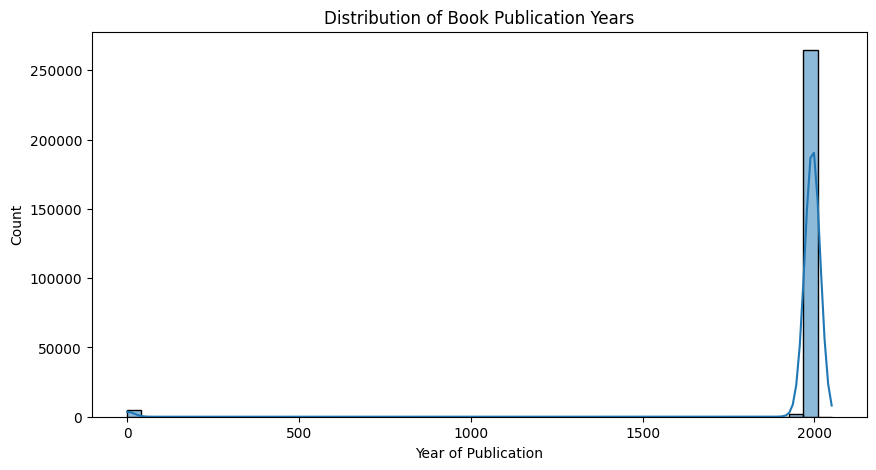

In [29]:
plt.figure(figsize=(10, 5))
sns.histplot(books_eda['Year-Of-Publication'], bins=50, kde=True)
plt.xlabel("Year of Publication")
plt.ylabel("Count")
plt.title("Distribution of Book Publication Years")
plt.show()

Distribusi data pada kolom `Year-Of-Publication` menunjukan rentang tahun yang jauh sekali, dengan konsentrasi data pada tahun 2000an.

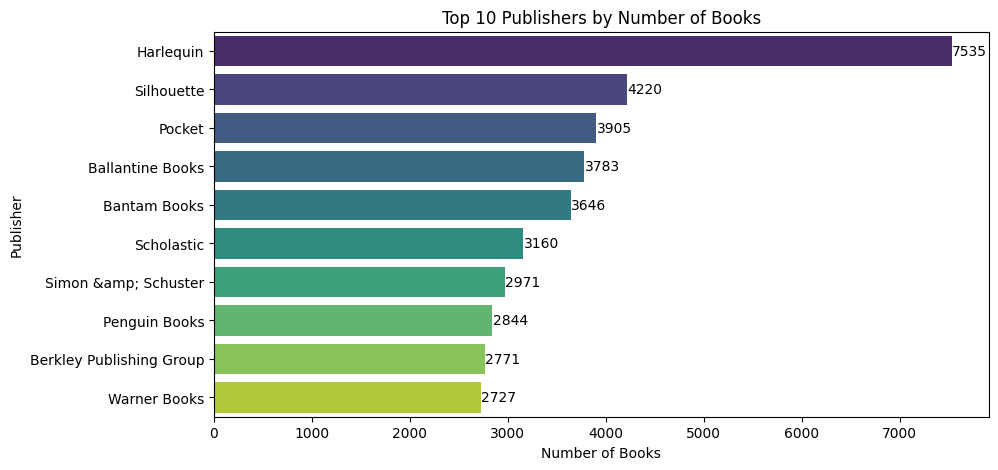

In [30]:
# Top 10 Publisher
top_publishers = books_eda['Publisher'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_publishers.values, y=top_publishers.index, palette="viridis", hue=top_publishers.index)
plt.xlabel("Number of Books")
plt.ylabel("Publisher")
plt.title("Top 10 Publishers by Number of Books")

for i, v in enumerate(top_publishers.values):
    plt.text(v + 1, i, str(v), color='black', va='center')

plt.show()

Berdasarkan visualisasi data di atas, kita dapat melihat bahwa publisher `Harlequin` adalah publisher yang paling banyak menerbitkan buku dengan jumlah 7535 buku.

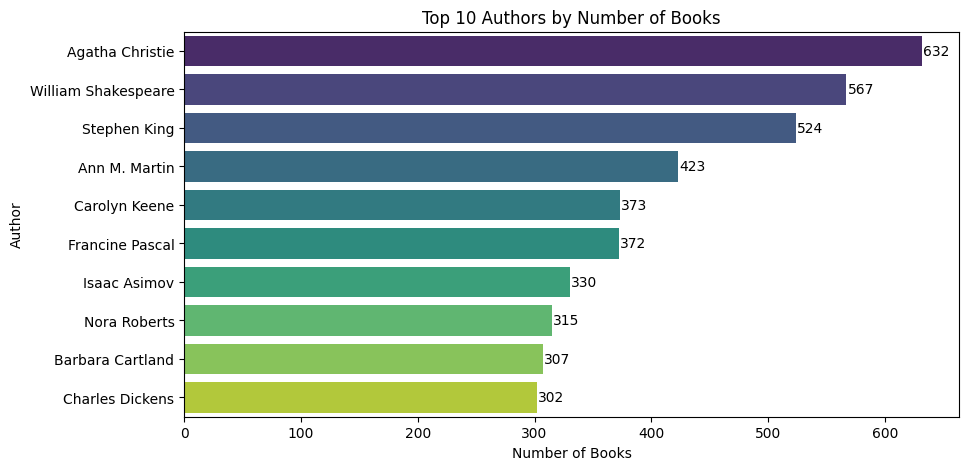

In [31]:
# Top 10 Author
top_authors = books_eda['Book-Author'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_authors.values, y=top_authors.index, palette="viridis", hue=top_authors.index)
plt.xlabel("Number of Books")
plt.ylabel("Author")
plt.title("Top 10 Authors by Number of Books")

for i, v in enumerate(top_authors.values):
    plt.text(v + 1, i, str(v), color='black', va='center')

plt.show()


Visualisasi data di atas menunjukkan bahwa author `Agatha Christie` adalah author yang paling banyak menerbitkan buku dengan jumlah 632 buku.

### Ratings.CSV

Selanjutnya mari kita eksplorasi file ratings.csv untuk memahami lebih dalam dataset tersebut

In [32]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


File rating.csv memiliki size 26.3 MB dan terdapat 1.149.780 data rating buku yang diberikan oleh user.

In [33]:
ratings.describe()

,User-ID,Book-Rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


In [34]:
ratings.isnull().sum()

,0
User-ID,0
ISBN,0
Book-Rating,0


Tidak terdapat missing values pada file ratings.csv

In [35]:
ratings.duplicated().sum()

0

Tidak terdapat data duplikat pada file ratings.csv

In [36]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


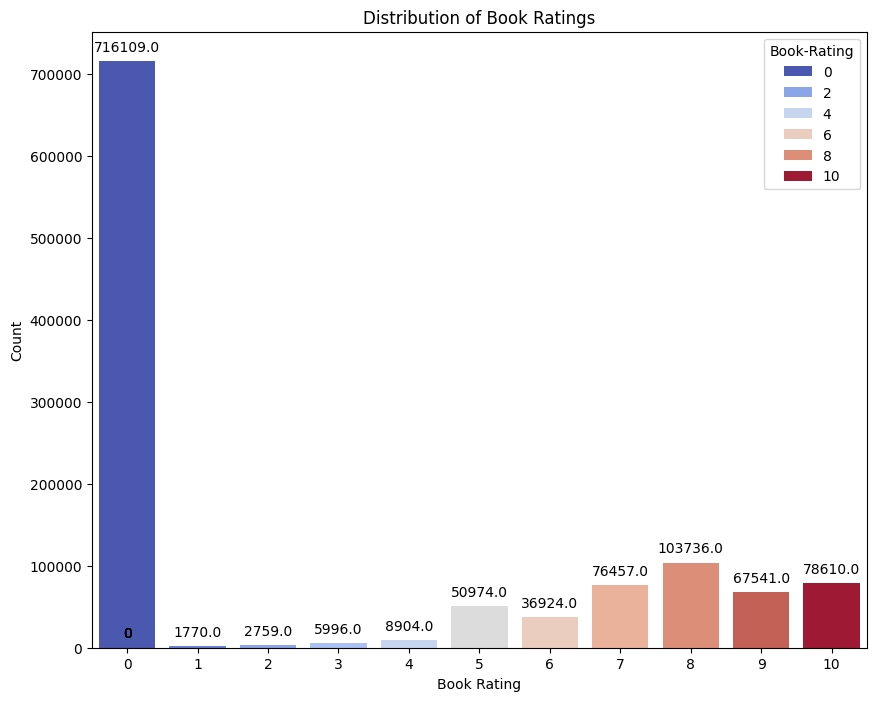

In [37]:
plt.figure(figsize=(10, 8))
ax = sns.countplot(x=ratings["Book-Rating"], palette="coolwarm", hue=ratings["Book-Rating"])
plt.xlabel("Book Rating")
plt.ylabel("Count")
plt.title("Distribution of Book Ratings")
plt.xticks(range(11))

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

Dari visualisasi tersebut terdapat 716109 data yang memiliki rating 0, yang mungkin menunjukkan bahwa user tersebut belum memberikan rating pada buku tersebut. Data ini tidak relevan untuk digunakan dalam sistem rekomendasi, maka kita akan menghapus data tersebut. Di sisi lain rating 8 adalah rating yang paling banyak diberikan oleh user dan rating 1 adalah rating yang paling sedikit diberikan oleh user.

### Users.CSV

Selanjutnya mari kita eksplorasi file users.csv untuk memahami lebih dalam dataset tersebut

In [38]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [39]:
users.describe()

,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


Berdasarkan statistik deskriptif di atas, kita dapat melihat bahwa usia pengguna memiliki rentang nilai dari 0 hingga 244. Kita akan melakukan cleaning data pada kolom `Age` dengan menghapus data yang tidak relevan.

In [40]:
users.isnull().sum()

,0
User-ID,0
Location,0
Age,110762


Data pada kolom `Age` memiliki missing values sebanyak 110.762 data, kita akan melakukan imputasi data pada kolom tersebut dengan menggunakan median.

In [41]:
users.duplicated().sum()

0

Tidak terdapat data duplikat pada file users.csv

In [42]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


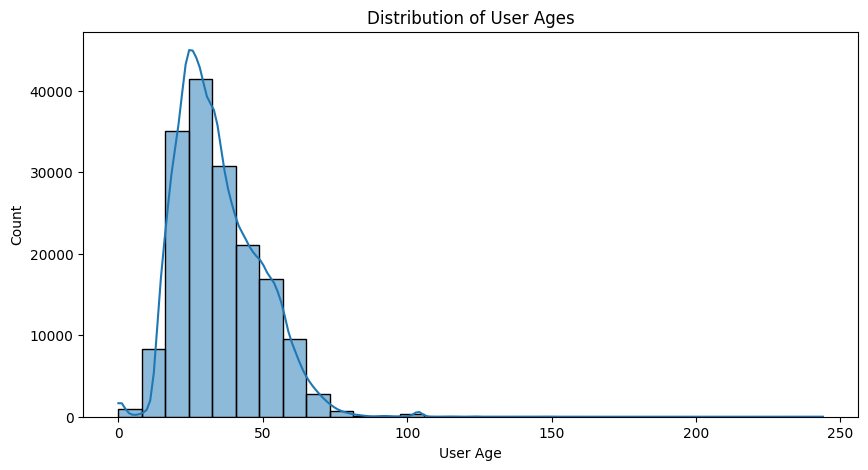

In [43]:
plt.figure(figsize=(10, 5))
sns.histplot(users["Age"].dropna(), bins=30, kde=True)
plt.xlabel("User Age")
plt.ylabel("Count")
plt.title("Distribution of User Ages")
plt.show()

Berdasarkan visualisasi data di atas, kita dapat melihat bahwa mayoritas pengguna berusia antara 20-30 tahun, dengan rentang data yang sangat jauh dari 0 hingga 244.

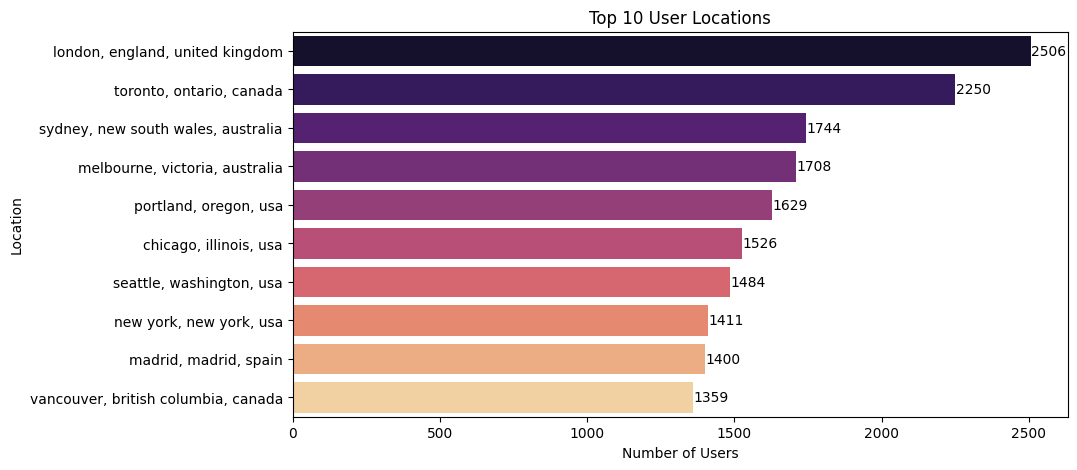

In [44]:
top_locations = users["Location"].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_locations.values, y=top_locations.index, palette="magma", hue=top_locations.index)
plt.xlabel("Number of Users")
plt.ylabel("Location")
plt.title("Top 10 User Locations")

for i, v in enumerate(top_locations.values):
    plt.text(v + 1, i, str(v), color='black', va='center')

plt.show()

Top 10 lokasi pengguna yang paling banyak terdaftar dalam dataset adalah `london, england, united kingdom` dengan jumlah 2506 pengguna.

## Data Preparation

Sebelum melakukan modeling, data harus bersih dan rapi terlebih dahulu, maka dari itu kita harus melakukan pembersihan data dari duplikasi, dan missing values.

### Books.csv

Berdasarkan EDA yang telah dilakukan, terdapat beberapa missing values dalam data books.csv yaitu:
- 2 missing values pada kolom `Book-Author`
- 2 missing values pada kolom `Publisher`

Selain itu, terdapat data yang tidak valid pada kolom `Year-Of-Publication` yaitu:
- `DK Publishing Inc`
- `Gallimard`
- Tahun 0
- Tahun 2037

Mari kita lakukan pembersihan data. Untuk missing values pada kolom `Book-Author` dan `Publisher`, kita akan menghapusnya. Sedangkan untuk data yang tidak valid pada kolom `Year-Of-Publication`, kita akan menghapus data yang bukan rentang dari tahun 1960 hingga 2025. Hal ini dilakukan karena data yang tidak valid tersebut hanya sedikit dan tidak akan mempengaruhi hasil rekomendasi.

In [3]:
print("Missing Values in Books:\n", books.isnull().sum(), "\n")
print("Duplicated Data in Books:\n", books.duplicated().sum())

Missing Values in Books:
 ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
dtype: int64 

Duplicated Data in Books:
 0


In [ ]:
# Handle invalid 'Year-Of-Publication' values
books['Year-Of-Publication'] = pd.to_numeric(books['Year-Of-Publication'], errors='coerce')
books = books.dropna(subset=['Year-Of-Publication'])
books['Year-Of-Publication'] = books['Year-Of-Publication'].astype(int)
# Filter books published between 1960 and 2025
books = books[(books["Year-Of-Publication"] >= 1960) & (books["Year-Of-Publication"] <= 2025)]

books = books.dropna()
books = books.drop_duplicates()

<ipython-input-4-a864fd9c8f8b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books['Year-Of-Publication'] = books['Year-Of-Publication'].astype(int)


Setelah selesai melakukan pemberishan, mari kita cek sekali lagi apakah masih terdapat missing values atau tidak

In [ ]:
# Missing Values data books
books.isnull().sum()

,0
ISBN,0
Book-Title,0
Book-Author,0
Year-Of-Publication,0
Publisher,0


In [ ]:
# Duplicated data books
books.duplicated().sum()

0

In [7]:
# Mengecek nilai unik di kolom 'Year-Of-Publication'
print(books['Year-Of-Publication'].unique())

[2002 2001 1991 1999 2000 1993 1996 1988 2004 1998 1994 2003 1997 1983
 1979 1995 1982 1985 1992 1986 1978 1980 1987 1990 1981 1989 1984 1968
 1961 1974 1976 1971 1977 1975 1965 1970 1962 1973 1972 1960 1966 1963
 1964 1969 1967 2005 2011 2020 2010 2021 2012 2006 2008 2024]


Sekarang, data sudah bersih mari kita lakukan visualisasi data untuk melihat distribusi data kembali.

#### Advanced EDA After Cleaning

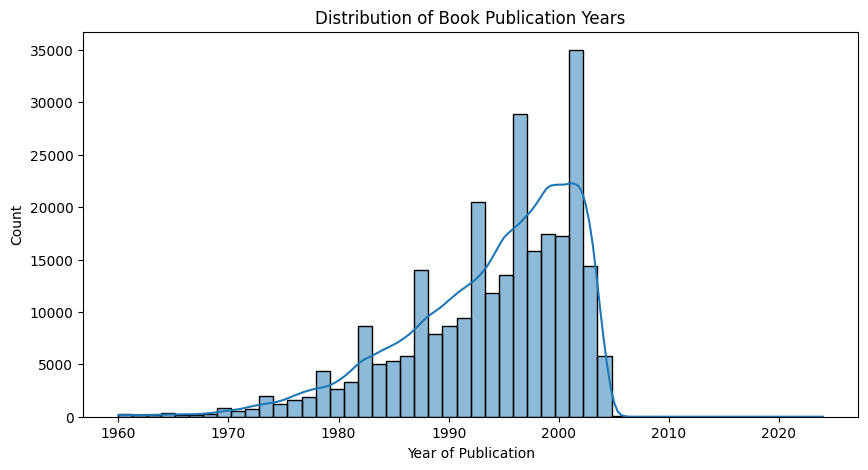

In [50]:
plt.figure(figsize=(10, 5))
sns.histplot(books['Year-Of-Publication'], bins=50, kde=True)
plt.xlabel("Year of Publication")
plt.ylabel("Count")
plt.title("Distribution of Book Publication Years")
plt.show()

Sekarang kita dapat melihat distribusi data yang lebih baik setelah melakukan cleaning data. Distribusi data pada kolom `Year-Of-Publication` menunjukan rentang tahun yang lebih konsisten, dengan konsentrasi data pada tahun 2000an.

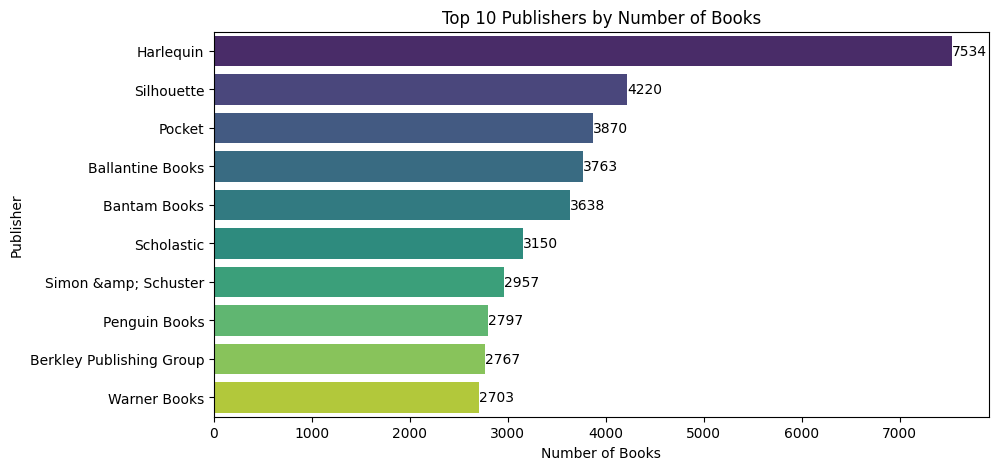

In [51]:
# Top 10 Publisher
top_publishers = books['Publisher'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_publishers.values, y=top_publishers.index, palette="viridis", hue=top_publishers.index)
plt.xlabel("Number of Books")
plt.ylabel("Publisher")
plt.title("Top 10 Publishers by Number of Books")

for i, v in enumerate(top_publishers.values):
    plt.text(v + 1, i, str(v), color='black', va='center')

plt.show()

Setelah dilakukan cleaning data, publisher `Harlequin` masih menjadi publisher yang paling banyak menerbitkan buku dengan jumlah 7534 buku.

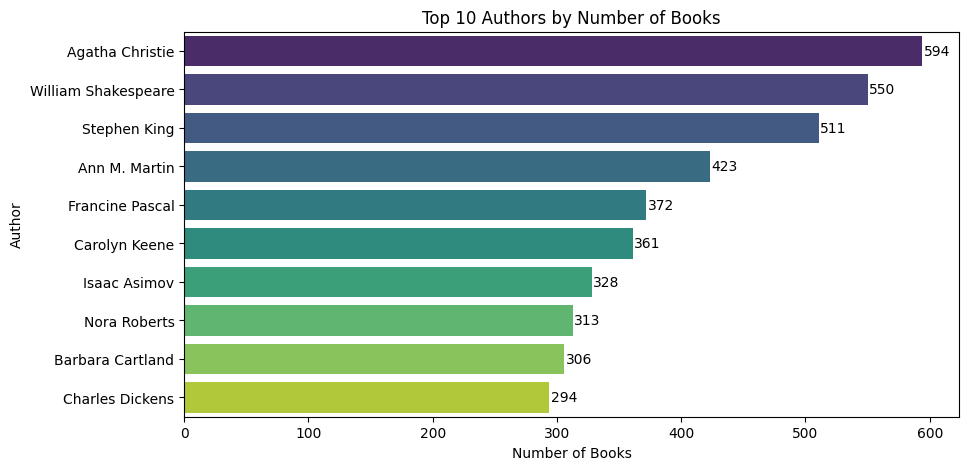

In [52]:
# Top 10 Author
top_authors = books['Book-Author'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_authors.values, y=top_authors.index, palette="viridis", hue=top_authors.index)
plt.xlabel("Number of Books")
plt.ylabel("Author")
plt.title("Top 10 Authors by Number of Books")

for i, v in enumerate(top_authors.values):
    plt.text(v + 1, i, str(v), color='black', va='center')

plt.show()


Begitupun dengan author `Agatha Christie` masih menjadi author yang paling banyak menerbitkan buku dengan jumlah 594 buku meskipun mengalami penurunan.

### Ratings.csv

Berdasarkan EDA yang telah dilakukan, tidak terdapat missing values dan duplicated data pada file ratings.csv. Namun, terdapat 716.109 data rating 0, artinya tidak relevan karena user tersebut belum memberikan rating pada buku tersebut. Data ini tidak relevan untuk digunakan dalam sistem rekomendasi, maka kita akan menghapus data tersebut.

In [8]:
print("Missing Values in Ratings:\n", ratings.isnull().sum(), "\n")
print("Duplicated Data in Ratings:\n", ratings.duplicated().sum())

Missing Values in Ratings:
 User-ID        0
ISBN           0
Book-Rating    0
dtype: int64 

Duplicated Data in Ratings:
 0


In [ ]:
# Drop rows where 'Book-Rating' is 0
ratings = ratings[ratings['Book-Rating'] != 0]
ratings.shape

(433671, 3)

In [10]:
ratings.describe()

,User-ID,Book-Rating
count,433671.000000,433671.000000
mean,135458.743451,7.601066
std,80678.385078,1.843798
min,8.000000,1.000000
25%,66619.000000,7.000000
50%,133184.000000,8.000000
75%,205735.000000,9.000000
max,278854.000000,10.000000


Setelah melakukan pembersihan data, kita dapat melihat bahwa rata-rata rating yang diberikan oleh user adalah 7.6.

#### Advanced EDA after cleaning

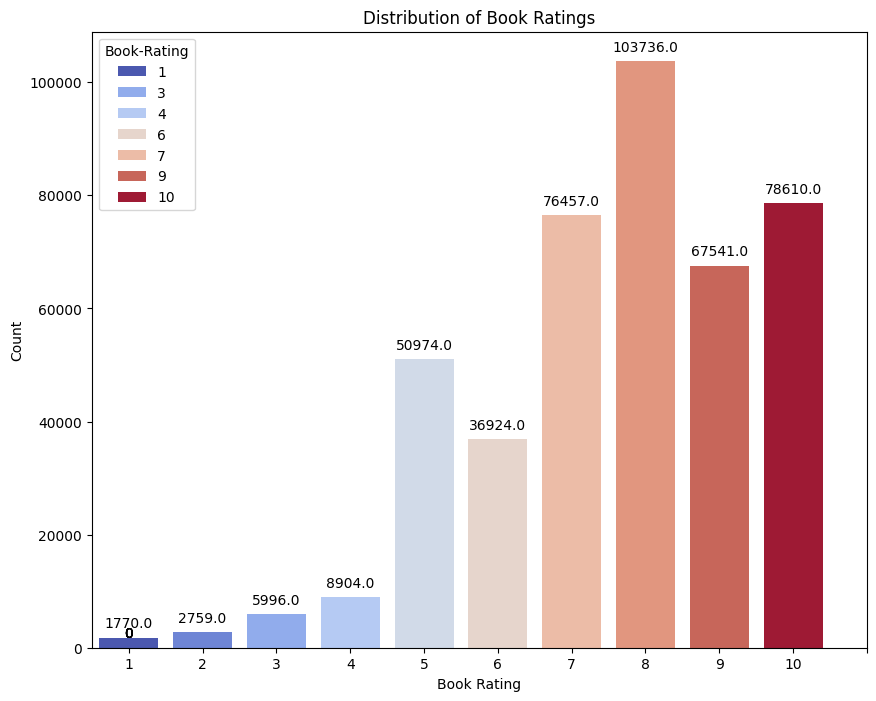

In [56]:
plt.figure(figsize=(10, 8))
ax = sns.countplot(x=ratings["Book-Rating"], palette="coolwarm", hue=ratings["Book-Rating"])
plt.xlabel("Book Rating")
plt.ylabel("Count")
plt.title("Distribution of Book Ratings")
plt.xticks(range(11))

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

Distribusi rating yang diberikan oleh user menunjukkan bahwa mayoritas user memberikan rating 8, diikuti oleh rating 10 dan rating 7.

### Users.csv

Berdasarkan EDA yang telah dilakukan, terdapat missing values pada kolom `Age` sebanyak 110.762 data. Selain itu, data pada kolom `Age` memiliki rentang nilai yang tidak masuk akal yaitu dari 0 hingga 244. Kita akan melakukan cleaning data pada kolom `Age` dengan menghapus data yang tidak relevan dan mengisi missing values dengan median.

In [10]:
print("Missing Values in Users:\n", users.isnull().sum(), "\n")
print("Duplicated Data in Users:\n", users.duplicated().sum())

Missing Values in Users:
 User-ID          0
Location         0
Age         110762
dtype: int64 

Duplicated Data in Users:
 0


Kita hanya akan menggunakan data pengguna yang berusia antara 5 hingga 80 tahun, karena data di luar rentang tersebut tidak relevan dan mungkin merupakan data yang kurang valid.

In [11]:
# Remove age outliers
users = users[(users['Age'] >= 5) & (users['Age'] <= 80)]

# Impute missing age values with the median
median_age = round(users['Age'].median())
users['Age'] = users['Age'].fillna(median_age)


<ipython-input-11-f6ffe211ec1d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users['Age'] = users['Age'].fillna(median_age)


In [13]:
users.describe()

,User-ID,Age
count,166628.000000,166628.000000
mean,139393.764109,34.678397
std,80553.911373,13.510476
min,2.000000,5.000000
25%,69912.500000,24.000000
50%,139358.000000,32.000000
75%,209156.500000,44.000000
max,278855.000000,80.000000


Berdasarkan data statistik deskriptif, kita dapat melihat bahwa usia pengguna memiliki rentang nilai yang lebih masuk akal yaitu dari 5 hingga 80 tahun. Selain itu, rata-rata usia pengguna adalah 34 tahun.

#### Advanced EDA After Cleaning

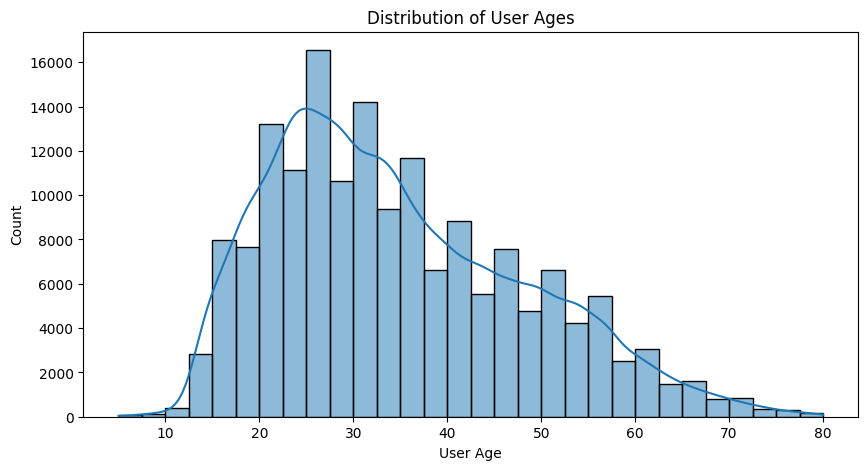

In [60]:
plt.figure(figsize=(10, 5))
sns.histplot(users["Age"].dropna(), bins=30, kde=True)
plt.xlabel("User Age")
plt.ylabel("Count")
plt.title("Distribution of User Ages")
plt.show()

Distribusi data usia pengguna menunjukkan bahwa mayoritas pengguna berusia antara 20-30 tahun. Setelah dilakukan cleaning data, top 10 lokasi pengguna yang paling banyak terdaftar dalam dataset adalah `london, england, united kingdom` dengan jumlah 2506 pengguna.

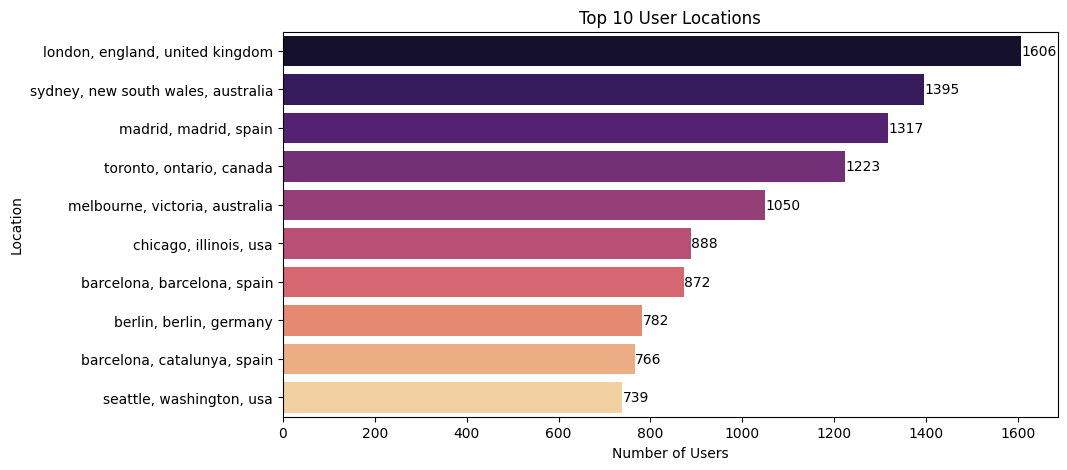

In [61]:
top_locations = users["Location"].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_locations.values, y=top_locations.index, palette="magma", hue=top_locations.index)
plt.xlabel("Number of Users")
plt.ylabel("Location")
plt.title("Top 10 User Locations")

for i, v in enumerate(top_locations.values):
    plt.text(v + 1, i, str(v), color='black', va='center')

plt.show()

# Model Development dengan Content Based Filtering

Pada tahap ini kita akan membuat model rekomendasi untuk content based filtering dengan TF-IDF berdasarkan kombinasi dari judul buku, penulis, dan penerbit. Kita akan menggunakan data dari file books.csv yang telah dibersihkan sebelumnya.

In [12]:
books.info()

<class 'pandas.core.frame.DataFrame'>
Index: 265807 entries, 0 to 271359
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 265807 non-null  object
 1   Book-Title           265807 non-null  object
 2   Book-Author          265807 non-null  object
 3   Year-Of-Publication  265807 non-null  int64 
 4   Publisher            265807 non-null  object
dtypes: int64(1), object(4)
memory usage: 12.2+ MB


Dikarenakan data yang digunakan terlalu besar, kita akan menggunakan 85.000 data acak dari file books.csv untuk membuat model rekomendasi.

In [14]:
NUM_ROWS = 85000
books_cbf = books.copy()
books_cbf = books_cbf.sample(NUM_ROWS, random_state=42).reset_index(drop=True)

In [15]:
books_cbf.sample(5)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
62695,0807220299,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,2003,Random House Audio Publishing Group
18297,0374147493,Elizabeth: A Biography of Britain's Queen,Sarah Bradford,1996,Farrar Straus &amp; Giroux
70995,0553275674,"Double Love (Sweet Valley High, No. 1)",Francine Pascal,1984,Sweet Valley
83927,0618056823,1919: Volume Two of the U.S.A. Trilogy,John Dos Passos,2000,Mariner Books
70315,0140434925,Little Dorrit (Penguin Classics),Charles Dickens,1998,Penguin Books


In [ ]:
# Combine 'Book-Title', 'Book-Author', and 'Publisher' into 'content'
books_cbf["content"] = books_cbf["Book-Title"] + " " + books_cbf["Book-Author"] + " " + books_cbf["Publisher"]
books_cbf[["Book-Title", "content"]].head()


,Book-Title,content
0,The Case for Christianity (C.S. Lewis Classics),The Case for Christianity (C.S. Lewis Classics...
1,The cold room,The cold room Jeffrey Caine Knopf : distribute...
2,La Bruja Que Vino del Mar,La Bruja Que Vino del Mar Victoria Holt Vergar...
3,Grapes (Fruit Shaped Books),Grapes (Fruit Shaped Books) Susan Banta Wester...
4,The North Dakota Joke Book,The North Dakota Joke Book Mike Dalton Jove Books


## TF-IDF

Kita akan menggunakan TF-IDF untuk mengubah kombinasi fitur penulis, penerbit dan judul buku menjadi representasi numeric, sehingga nantinya akan dihitung menggunakan cosine similarity untuk mendapatkan rekomendasi.

In [17]:
# Vectorize
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(books_cbf['content'].astype(str))

## Cosine Similarity

Setelah fitur diubah menjadi representasi numerik, langkah selanjutnya adalah menghitung kemiripan antar buku menggunakan Cosine Similarity. Semakin mirip dua buku berdasarkan fitur mereka, semakin tinggi skor kemiripan. Kita menggunakan parameter dense_output=False untuk menghemat memori, agar notebook tidak crash.

In [18]:
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix, dense_output=False)

## Get Recommendation

Buat fungsi untuk memberikan rekomendasi buku berdasarkan judul yang diberikan. Fungsi ini akan mencari buku yang memiliki skor kemiripan tertinggi dengan buku yang dicari.

In [ ]:
def get_recommendations(book_title, books, cosine_sim, k=10):
    idx = books[books["Book-Title"].str.lower().str.strip() == book_title.lower().strip()].index
    if len(idx) == 0:
        return "Buku tidak ditemukan dalam dataset!"

    idx = idx[0]
    similarity_scores = cosine_sim[idx].toarray().flatten()
    similar_indices = np.argsort(similarity_scores)[::-1][1:k+1]

    recommended_books = books.iloc[similar_indices].copy()
    recommended_books["Similarity"] = similarity_scores[similar_indices]

    return recommended_books

Kita akan mencoba memberikan rekomendasi buku berdasarkan judul `High Society` dengan 10 rekomendasi buku yang memiliki skor kemiripan tertinggi.

In [38]:
BOOK_TITLE_PREDICT = 'High Society'
recommended_books = get_recommendations(BOOK_TITLE_PREDICT, books_cbf, cosine_sim, k=10)
recommended_books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,content,Similarity
32908,0751501999,Stark,Ben Elton,1989,Warner Books,Stark Ben Elton Warner Books,0.466023
49928,1856851273,"Elton, My Elton",Gary Clarke,1996,Blake Publishing Ltd,"Elton, My Elton Gary Clarke Blake Publishing Ltd",0.395006
37612,0671718177,This Other Eden,Ben Elton,1993,Simon &amp; Schuster (Trade Division),This Other Eden Ben Elton Simon &amp; Schuster...,0.387760
63152,0385334524,Blast from the Past,Ben Elton,2000,Delta,Blast from the Past Ben Elton Delta,0.385531
56063,0552146986,Inconceivable,Ben Elton,2000,Bantam Doubleday Dell,Inconceivable Ben Elton Bantam Doubleday Dell,0.380187
81516,0751510114,Gridlock,Ben Elton,1992,"Acacia Press, Inc.","Gridlock Ben Elton Acacia Press, Inc.",0.376230
6134,0552998338,Blast From the Past,Ben Elton,1999,Bantam Doubleday Dell,Blast From the Past Ben Elton Bantam Doubleday...,0.371029
77057,0440106117,The Black Swan,Day Taylor,1984,Bantam Books (Mm),The Black Swan Day Taylor Bantam Books (Mm),0.362999
58165,055299863X,Marlene Dietrich Lived Here,Eleanor Bailey,2003,"Black Swan Books, Limited",Marlene Dietrich Lived Here Eleanor Bailey Bla...,0.353247
60988,0552770973,I Like It Like That,Claire Calman,2003,"Black Swan Books, Limited",I Like It Like That Claire Calman Black Swan B...,0.347790


Yeay! Akhirnya kita berhasil membuat sistem rekomendasi content based filetering dengan TF-IDF. Kita telah berhasil memberikan rekomendasi buku berdasarkan judul dengan memanfaatkan fitur-fitur yang ada pada dataset books.csv.

## Content Based Filtering Evaluation

Untuk mengevaluasi model content based filtering yang telah dibuat, kita akan menggunakan metode evaluasi precision at k. Kita akan membandingkan rekomendasi yang diberikan oleh model dengan rekomendasi yang seharusnya diberikan.

In [ ]:
def precision_at_k(recommended_books, base_book, k=5):
    relevant = 0
    top_k_recommendations = recommended_books.head(k)

    for _, book in top_k_recommendations.iterrows():
        if (book['Book-Title'] == base_book['Book-Title']) or (book['Book-Author'] == base_book['Book-Author']) or (book['Publisher'] == base_book['Publisher']):
            relevant += 1

    return relevant / k

# ** Evaluasi Precision@K **
base_book = books_cbf[books_cbf['Book-Title'].str.lower() == BOOK_TITLE_PREDICT.lower().strip()].iloc[0]
precision = precision_at_k(recommended_books, base_book, k=10)
print(f"Precision@10: {precision:.2f}")

print("\nEvaluation Detail:")
print("Book to Search:", BOOK_TITLE_PREDICT)
print("\nTop 10 books with title, author and publisher similarities:")
for _, data in recommended_books.head(10).iterrows():
    print(f"Title: {data['Book-Title']}")
    print(f"Author: {data['Book-Author']}")
    print(f"Publisher: {data['Publisher']}")
    print("-" * 50)

Precision@10: 0.80

Evaluation Detail:
Book to Search: High Society

Top 10 books with title, author and publisher similarities:
Title: Stark
Author: Ben Elton
Publisher: Warner Books
--------------------------------------------------
Title: Elton, My Elton
Author: Gary Clarke
Publisher: Blake Publishing Ltd
--------------------------------------------------
Title: This Other Eden
Author: Ben Elton
Publisher: Simon &amp; Schuster (Trade Division)
--------------------------------------------------
Title: Blast from the Past
Author: Ben Elton
Publisher: Delta
--------------------------------------------------
Title: Inconceivable
Author: Ben Elton
Publisher: Bantam Doubleday Dell
--------------------------------------------------
Title: Gridlock
Author: Ben Elton
Publisher: Acacia Press, Inc.
--------------------------------------------------
Title: Blast From the Past
Author: Ben Elton
Publisher: Bantam Doubleday Dell
--------------------------------------------------
Title: The Black S

Hasil precision menunjukan angka 0.80 dari 10 rekomendasi yang diberikan oleh model, 8 di antaranya adalah rekomendasi yang relevan. Hal ini menunjukkan bahwa model content based filtering yang telah dibuat memiliki tingkat akurasi yang baik dalam memberikan rekomendasi buku.

# Model Development dengan Collaborative Filtering

## Data Preaparation

Sebelum melakukan pembuatan model, kita harus memastikan bahwa data telah bersih dari duplicated data dan missing values

In [41]:
# Missing Values data Rating
ratings.isnull().sum()

,0
User-ID,0
ISBN,0
Book-Rating,0


Tidak terdapat missing values pada file rating.csv

In [58]:
ratings.duplicated().sum()

0

### Encoding User-ID dan ISBN

Pada tahap ini kita akan melakukan encoding pada kolom User-ID dan ISBN untuk mempermudah proses modeling. Hal ini dilakukan dengan mengubah User-ID dan ISBN menjadi kategori yang unik.

In [ ]:
# Encoding User-ID and ISBN
user_ids = ratings['User-ID'].unique().tolist()
book_ids = ratings['ISBN'].unique().tolist()

user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
book_to_book_encoded = {x: i for i, x in enumerate(book_ids)}

Encoding dilakukan untuk mengubah data kategorikal, seperti User-ID dan ISBN, menjadi format numerik agar dapat diproses oleh model machine learning

In [47]:
# Mapping to dataframe
ratings['user'] = ratings['User-ID'].map(user_to_user_encoded)
ratings['book'] = ratings['ISBN'].map(book_to_book_encoded)

num_users = len(user_to_user_encoded)
num_books = len(book_to_book_encoded)

print(f"total user encoded: {num_users}")
print(f"total book encoded: {num_books}")

total user encoded: 77805
total book encoded: 185973


Terdapat 77.805 unique User-ID dan 185.973 unique ISBN dalam dataset

### Normalisasi Rating
Mengubah nilai rating ke skala antara 0 dan 1 untuk memudahkan proses pelatihan model.

In [48]:
min_rating = ratings['Book-Rating'].min()
max_rating = ratings['Book-Rating'].max()
ratings['Book-Rating'] = (ratings['Book-Rating'] - min_rating) / (max_rating - min_rating)

## Membagi data menjadi training dan validation

Membagi dataset menjadi:
- 80% data training untuk melatih model.
- 20% data validation untuk mengevaluasi performa model selama pelatihan.

- x_train dan x_val: Berisi pasangan user dan book.
- y_train dan y_val: Berisi rating yang menjadi target.

Acak data sebelum membagi dataset menjadi training dan validation untuk menghindari bias.

In [49]:
ratings = ratings.sample(frac=1, random_state=42)
ratings

,User-ID,ISBN,Book-Rating,user,book
144846,32440,0380018179,0.777778,9713,1013
211411,49144,8422641127,0.444444,14390,54663
647520,156424,3442453844,0.666667,44370,127953
30124,7125,0060586125,0.777778,2587,10359
1052982,251606,0316789844,0.777778,70897,7053
...,...,...,...,...,...
658592,159834,0441132456,0.666667,45235,70428
958724,231613,0747542333,0.444444,65186,33018
335707,79923,0440206154,0.777778,22993,6822
373697,89610,8880891960,0.444444,25753,84887


In [50]:
train_indices = int(0.8 * ratings.shape[0])
x_train, x_val = ratings[['user', 'book']].values[:train_indices], ratings[['user', 'book']].values[train_indices:]
y_train, y_val = ratings['Book-Rating'].values[:train_indices], ratings['Book-Rating'].values[train_indices:]

## Membangun Model Collaborative Filtering menggunakan TensorFlow
Membuat arsitektur model dengan:

- Embedding Layer:
Digunakan untuk memetakan user dan book ke dalam vektor berdimensi rendah.
- Dot Product:
Menghitung kesamaan antara vektor user dan book.
- Bias:
Menambahkan nilai bias ke hasil prediksi untuk menangkap kecenderungan individu.

In [51]:
class RecommenderNet(tf.keras.Model):
    def __init__(self, num_users, num_books, embedding_size):
        super(RecommenderNet, self).__init__()
        self.user_embedding = layers.Embedding(num_users, embedding_size, embeddings_initializer='he_normal')
        self.book_embedding = layers.Embedding(num_books, embedding_size, embeddings_initializer='he_normal')
        self.user_bias = layers.Embedding(num_users, 1)
        self.book_bias = layers.Embedding(num_books, 1)

    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:, 0])
        book_vector = self.book_embedding(inputs[:, 1])
        user_bias = self.user_bias(inputs[:, 0])
        book_bias = self.book_bias(inputs[:, 1])

        dot_product = tf.tensordot(user_vector, book_vector, 2)
        output = dot_product + user_bias + book_bias
        return tf.nn.sigmoid(output)

## Menyiapkan model

Model ini menggunakan Mean Squared Error (MSE) sebagai loss function, Adam sebagai optimizer, dan Root Mean Squared Error (RMSE) sebagai metrics evaluation.

In [52]:
embedding_size = 35
model = RecommenderNet(num_users, num_books, embedding_size)

model.compile(
    loss='mse',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

- Ukuran Embedding:
Mengatur dimensi embedding untuk user dan book.
- Kompilasi Model:
  - Loss: Menggunakan mean squared error sebagai loss function karena rating bersifat continuous.
  - Optimizer: Adam digunakan untuk memperbarui bobot secara efisien.


## Melatih Model
Langkah berikutnya, mulailah proses training.

In [53]:
history = model.fit(
    x_train, y_train,
    batch_size=64,
    epochs=5,
    validation_data=(x_val, y_val)
)

Epoch 1/5
5421/5421 ━━━━━━━━━━━━━━━━━━━━ 33s 5ms/step - loss: 0.0948 - root_mean_squared_error: 0.3079 - val_loss: 0.0867 - val_root_mean_squared_error: 0.2944
Epoch 2/5
5421/5421 ━━━━━━━━━━━━━━━━━━━━ 39s 5ms/step - loss: 0.0710 - root_mean_squared_error: 0.2663 - val_loss: 0.0507 - val_root_mean_squared_error: 0.2251
Epoch 3/5
5421/5421 ━━━━━━━━━━━━━━━━━━━━ 24s 4ms/step - loss: 0.0413 - root_mean_squared_error: 0.2032 - val_loss: 0.0476 - val_root_mean_squared_error: 0.2182
Epoch 4/5
5421/5421 ━━━━━━━━━━━━━━━━━━━━ 26s 5ms/step - loss: 0.0394 - root_mean_squared_error: 0.1985 - val_loss: 0.0474 - val_root_mean_squared_error: 0.2177
Epoch 5/5
5421/5421 ━━━━━━━━━━━━━━━━━━━━ 27s 5ms/step - loss: 0.0382 - root_mean_squared_error: 0.1955 - val_loss: 0.0470 - val_root_mean_squared_error: 0.2168


## Visualisasi Hasil Training

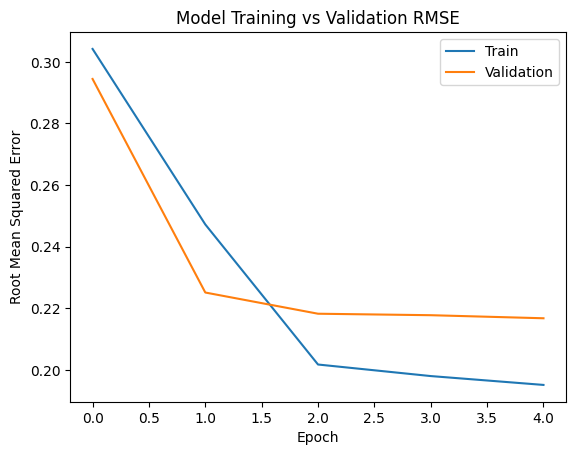

In [54]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('Model Training vs Validation RMSE')
plt.ylabel('Root Mean Squared Error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

Berdasarkan visualisasi data di atas, kita dapat melihat bahwa model telah belajar dengan baik dan loss-nya menurun seiring dengan epoch yang berjalan. Model memiliki root mean squared error sebesar 0.1955 pada data training dan 0.2168 pada data validation. Hal ini menunjukkan bahwa model memiliki performa yang baik dalam memprediksi rating buku.

## Membuat Rekomendasi untuk Pengguna

Membuat function untuk mendapatkan rekomendasi bagi pengguna
1. Mengambil buku yang belum dibaca oleh pengguna.
2. Menggunakan model untuk memprediksi rating setiap buku yang belum dibaca.
3. Memilih buku dengan rating prediksi tertinggi sebagai rekomendasi.

In [55]:
def get_book_recommendations(user_id, model, ratings, books, user_to_user_encoded, book_to_book_encoded, num_recommendations=10):
    user_idx = user_to_user_encoded[user_id]
    user_book_ids = set(ratings[ratings['User-ID'] == user_id]['ISBN'])
    all_book_ids = set(book_to_book_encoded.keys())
    unvisited_book_ids = list(all_book_ids - user_book_ids)
    unvisited_books_idx = [book_to_book_encoded[bid] for bid in unvisited_book_ids]

    user_book_pairs = np.hstack((
        np.full((len(unvisited_books_idx), 1), user_idx),
        np.array(unvisited_books_idx).reshape(-1, 1)
    ))

    predicted_ratings = model.predict(user_book_pairs).flatten()
    top_indices = predicted_ratings.argsort()[-num_recommendations * 2:][::-1]  # Ambil lebih banyak untuk menghindari error
    recommended_book_ids = [unvisited_book_ids[idx] for idx in top_indices]
    predicted_ratings = predicted_ratings[top_indices]

    recommendations = []
    for book_id, pred_rating in zip(recommended_book_ids, predicted_ratings):
        book_info = books[books['ISBN'] == book_id]
        if book_info.empty:
            continue
        book_info = book_info.iloc[0]

        recommendations.append({
            'ISBN': book_id,
            'Title': book_info['Book-Title'],
            'Author': book_info['Book-Author'],
            'Year': book_info['Year-Of-Publication'],
            'Publisher': book_info['Publisher'],
            'Predicted Rating': float(pred_rating * 10)
        })

        if len(recommendations) >= num_recommendations:
            break

    return recommendations

## Test Rekomendasi

Menampilkan 10 buku rekomendasi untuk pengguna tertentu berdasarkan prediksi rating tertinggi.

In [ ]:
# Get recommendations for a user
user_id = 276760
recommendations = get_book_recommendations(
    user_id=user_id,
    model=model,
    ratings=ratings,
    books=books,
    user_to_user_encoded=user_to_user_encoded,
    book_to_book_encoded=book_to_book_encoded
)

# Show recommendations
print(f"\nUser profiles: ")
print("-" * 80)
user_profile = users[users['User-ID'] == user_id].iloc[0]
print(f"User ID: {user_id}")
print(f"Location: {user_profile['Location']}")
print(f"Age: {user_profile['Age']}")
print("-" * 80)
print(f"\nTop 10 Book Recommendations for User {user_id}:")
print("-" * 80)
for i, rec in enumerate(recommendations, 1):
    print(f"{i}. {rec['Title']} by {rec['Author']}")
    print(f"   Year: {rec['Year']}, Publisher: {rec['Publisher']}")
    print(f"   Predicted Rating: {rec['Predicted Rating']:.2f}")
    print("-" * 80)


5812/5812 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step

 User profiles: 
--------------------------------------------------------------------------------
User ID: 276760
Location: santander, n/a, spain
Age: 25.0
--------------------------------------------------------------------------------

Top 10 Book Recommendations for User 276760:
--------------------------------------------------------------------------------
1. Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)) by J. K. Rowling
   Year: 1999, Publisher: Arthur A. Levine Books
   Predicted Rating: 6.01
--------------------------------------------------------------------------------
2. To Kill a Mockingbird by Harper Lee
   Year: 1988, Publisher: Little Brown &amp; Company
   Predicted Rating: 5.92
--------------------------------------------------------------------------------
3. The Da Vinci Code by Dan Brown
   Year: 2003, Publisher: Doubleday
   Predicted Rating: 5.85
--------------------------------------------------------

Kita sudah berhasil membuat model collaborative filtering menggunakan TensorFlow dan memberikan rekomendasi buku berdasarkan prediksi rating tertinggi. Model ini dapat memberikan rekomendasi buku kepada pengguna dengan akurasi yang sangat baik.